In [9]:
from perceptron import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read data into a DataFrame
data = pd.read_table("data.txt", delimiter=',', header=None, names=['x1', 'x2', 'y'])

# Compute powers of x1 and x2 up to degree 3
for i in range(2, 4):  # Start from 2 since we already have x1 and x2
    data[f'x1_{i}'] = data['x1'] ** i
    data[f'x2_{i}'] = data['x2'] ** i

# Separate features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y'].values
y = np.array(data['y'].values, dtype=np.float32)
X = np.insert(X, 0, 1, axis=1)
# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes of each set
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (3600, 7) (3600,)
Validation set: (450, 7) (450,)
Test set: (450, 7) (450,)


In [28]:
data

,x1,x2,y,x1_2,x2_2,x1_3,x2_3
0,4.780310,2.698320,0,22.851364,7.280931,109.236602,19.646281
1,-2.273710,5.750180,0,5.169757,33.064570,-11.754529,190.127229
2,-4.817170,-2.209610,0,23.205127,4.882376,-111.783041,-10.788148
3,-9.526940,0.659360,0,90.762586,0.434756,-864.689709,0.286660
4,1.864400,-5.019510,0,3.475987,25.195481,6.480631,-126.468967
...,...,...,...,...,...,...,...
4495,-4.327500,-0.210256,1,18.727256,0.044208,-81.042201,-0.009295
4496,-1.077300,1.279540,1,1.160575,1.637223,-1.250288,2.094892
4497,-2.377350,-3.078130,1,5.651793,9.474884,-13.436290,-29.164926
4498,0.508152,0.432983,1,0.258218,0.187474,0.131214,0.081173


Epoch 0 Error: 0.5036111111111111
Epoch 10 Error: 0.4822222222222222
Epoch 20 Error: 0.4558333333333333
Epoch 30 Error: 0.49944444444444447
Epoch 40 Error: 0.3286111111111111
Epoch 50 Error: 0.24611111111111106
Epoch 60 Error: 0.24
Epoch 70 Error: 0.23083333333333333
Epoch 80 Error: 0.22138888888888886
Epoch 90 Error: 0.21166666666666667
Epoch 100 Error: 0.18777777777777782
Epoch 110 Error: 0.1727777777777778
Epoch 120 Error: 0.1433333333333333


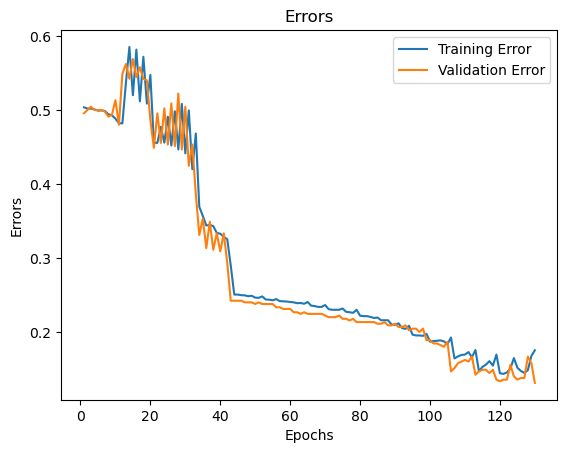

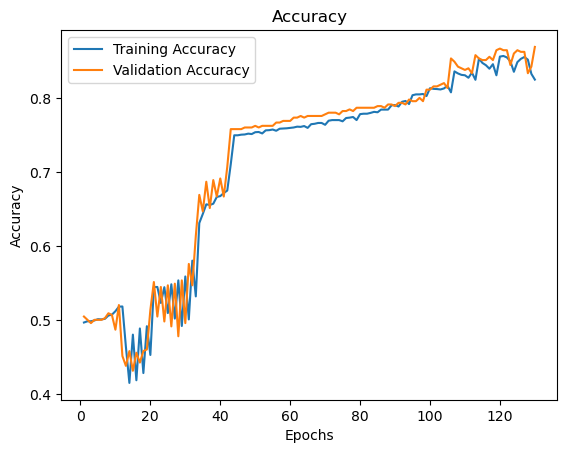


----------------------------------------------



In [23]:
perceptron = Perceptron(alpha=0.001, epochs=130)
perceptron.train(X_train, y_train, X_val, y_val)
perceptron.plot_learning_curve()
perceptron.plot_accuracy_curve()
print("\n----------------------------------------------\n")

Metrics for Training Data:

Metrics for Validation Data:

Metrics for Test Data:


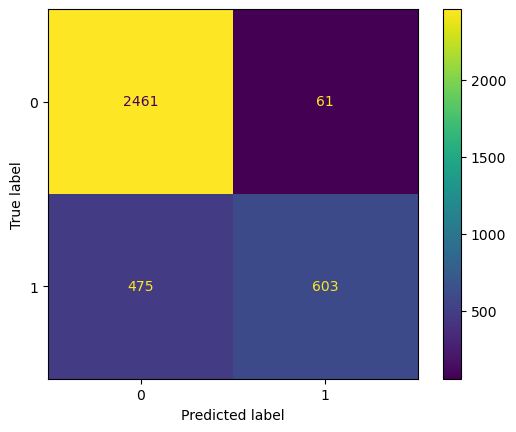

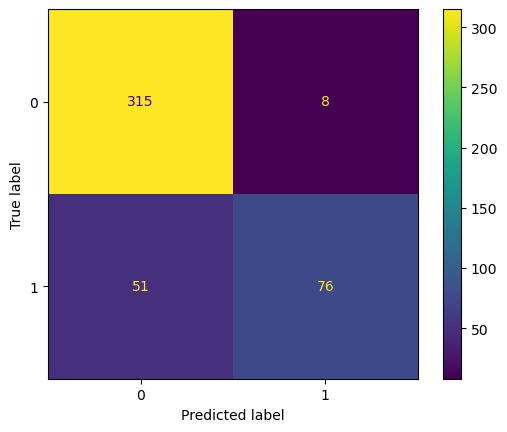

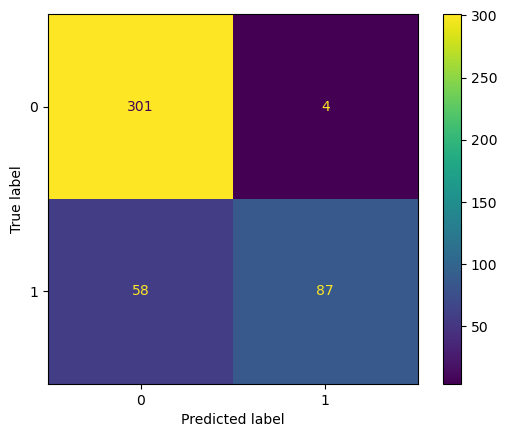

In [24]:
print("Metrics for Training Data:")
perceptron.plot_confusion_matrix(y_train, perceptron.predict(X_train))
print("\nMetrics for Validation Data:")
perceptron.plot_confusion_matrix(y_val,perceptron.predict(X_val))
print("\nMetrics for Test Data:")
perceptron.plot_confusion_matrix(y_test, perceptron.predict(X_test))

In [26]:
from sklearn.metrics import accuracy_score, f1_score
        # Calculate accuracy and F1-score
accuracy_train_score = accuracy_score(y_train, perceptron.predict(X_train))
f1_train_score = f1_score(y_train, perceptron.predict(X_train))

print(f"Accuracy for Train Data: {accuracy_train_score:.4f}")
print(f"F1-score for Train Data: {f1_train_score:.4f}")

accuracy_validation_score = accuracy_score(y_val, perceptron.predict(X_val))
f1_validation_score = f1_score(y_val, perceptron.predict(X_val))

print(f"Accuracy for Validation Data: {accuracy_validation_score:.4f}")
print(f"F1-score for Validation Data: {f1_validation_score:.4f}")

accuracy_test_score = accuracy_score(y_test, perceptron.predict(X_test))
f1_test_score = f1_score(y_test, perceptron.predict(X_test))

print(f"Accuracy for Test Data: {accuracy_test_score:.4f}")
print(f"F1-score for Test Data: {f1_test_score:.4f}")

Accuracy for Train Data: 0.8511
F1-score for Train Data: 0.6923
Accuracy for Validation Data: 0.8689
F1-score for Validation Data: 0.7204
Accuracy for Test Data: 0.8622
F1-score for Test Data: 0.7373


In [27]:
print("weights of the perceptron after training")
print("\n")
for i, weight in enumerate(perceptron.w):
    print(f"w{i} : {weight}")

weights of the perceptron after training


w0 : 0.49010267745795755
w1 : 0.015618092299819825
w2 : 0.4035930522431602
w3 : -0.03255889264873556
w4 : -0.08290794308412852
w5 : -0.00036837626156942314
w6 : -0.006550746375800094
